a) obtener con Python las diferentes medidas de centralización y 
dispersión, asimetría y curtosis estudiadas. Así mismo, obtener el 
diagrama de caja y bigotes. Se debe hacer por separado para la submuestra de los cráneos del predinástico temprano y para la submuestra de los del predinástico tardío. Comentar los resultados 
obtenidos. Estos comentarios son obligatorios

In [79]:
import os
import pandas  as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math as mt
from scipy.stats import pearsonr

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [80]:
df = pd.read_excel('Datosejercicoevaluacionalturaspython.xlsx')

In [81]:
df_1 = df[df['Época histórica']==1]
#muestra de predinastico temprano

In [82]:
df_2 = df[df['Época histórica']==2]
#muestra de predinastico tardio

MEDIDAS DE TENDENCIA CENTRAL - NO CENTRAL - DISPERSION - FORMA - PREDINASTICO TEMPRANO

In [83]:
valores_1 = pd.DataFrame(df_1['Altura del cráneo'].describe())
valores_1.reset_index(inplace=True)
valores_1.rename(columns={'index':'Medida'},inplace = True)

In [84]:
valores_1.head(5)
# Algunas de las medidas de tendencia central - calcularemos las faltantes- 

,Medida,Altura del cráneo
0,count,30.000000
1,mean,134.400000
2,std,1.069966
3,min,132.000000
4,25%,134.000000


In [85]:
#calculo de la moda para grupo 1 (temprano)
moda  = int(df_1['Altura del cráneo'].mode())

In [86]:
#calculo del rango (valor maximo - valor minimo)
rango = df_1['Altura del cráneo'].max() - df_1['Altura del cráneo'].min()

In [87]:
#calculo de la varianza
varianza = df_1['Altura del cráneo'].var()

In [88]:
#calculo del coeficiente de variacion de Pearson -- DESVIACION STANDAR / MEDIA
coef_var_P = valores_1.loc[2][1]/valores_1.loc[1][1]

In [89]:
df_1['Xi - Media'] = df_1['Altura del cráneo'] - valores_1.loc[1][1]
df_1['(Xi - Media)*3'] = df_1['Xi - Media']**3
df_1['(Xi - Media)*4'] = df_1['Xi - Media']**4
#Generacion de columnas de apoyo para el calculo de asimetria y curtosis // resultando en la siguiente tabla

In [90]:
df_1.head(5)
#tabla de los craneos del periodo temprano // con columnas de apoyo para el calculo de la forma de la distribucion

,Época histórica,Unnamed: 1,Altura del cráneo,Xi - Media,(Xi - Media)*3,(Xi - Media)*4
0,1,NaN,135,0.6,0.216,0.1296
1,1,NaN,137,2.6,17.576,45.6976
2,1,NaN,134,-0.4,-0.064,0.0256
3,1,NaN,135,0.6,0.216,0.1296
4,1,NaN,136,1.6,4.096,6.5536


In [91]:
Coef_Fisher=df_1['(Xi - Media)*3'].sum()/((df_1['Época histórica'].count()-1)*mt.pow(valores_1.loc[2][1],3))

In [92]:
Coef_Fisher
# al obteenr un ceficiente de Fisher negativo, esto indica que existe una mayor concentracion de valores a la izquierda del eje
# de simetria

-0.16214903067770184

In [93]:
coeficiente_Curtosis = df_1['(Xi - Media)*4'].sum()/((df_1['Época histórica'].count()-1)*mt.pow(valores_1.loc[2][1],4)) -3

In [94]:
coeficiente_Curtosis
#el coeficiente de curtosis es mayor que 0 por lo que podemos anticipar una distribucion leptocuritca

0.5407025693134031

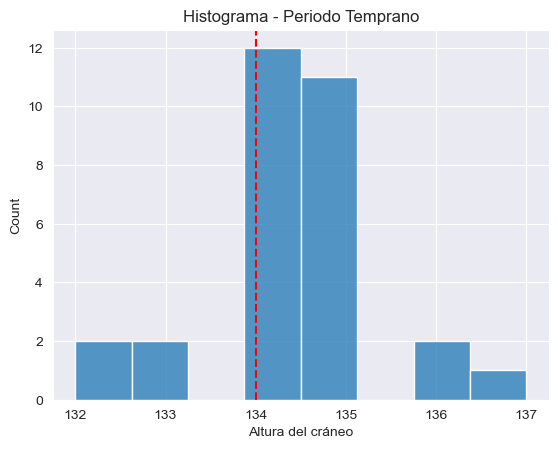

In [95]:
sns.histplot(data=df_1['Altura del cráneo'] )
plt.axvline(x=valores_1.loc[5][1], color='red', linestyle='--')
plt.title('Histograma - Periodo Temprano')
plt.show()

In [96]:
#de los coeficientes de FISHER Y CURTOSIS podemos determinar que
#del coeficinete de Fisher(-0.162149), la distribucion posee mayor concentracion de valores a la izquierda de  la mediana
#ademas el coeficiente de curtosis al ser mayor que 0 (0.5407) nos indica una distribucion leptocuritca valores 
#muy concnetrados alrededor de la mediana

#colocamos el histograma y una linea constante en la mediana, para observar el comportmiento-forma de la distribucion.
#evidentenmemente visualizacmos mayor concentracion por debajo de la mediana =134 y una concnetracion de valroes alrededor
#de esta

In [97]:
Medida = ['moda','rango','varianza','CoeficientePerson','CoeficienteFisher','CoeficienteCurtosis']
Altura_del_Craneo = [moda,rango, varianza,coef_var_P,Coef_Fisher,coeficiente_Curtosis]

medidas_2 = pd.DataFrame({'Medida':Medida,'Altura del cráneo':Altura_del_Craneo})
medidas_2

,Medida,Altura del cráneo
0,moda,134.000000
1,rango,5.000000
2,varianza,1.144828
3,CoeficientePerson,0.007961
4,CoeficienteFisher,-0.162149
5,CoeficienteCurtosis,0.540703


MEDIDAS PERIODO TEMPRANO

In [98]:
valores_w = pd.concat([valores_1,medidas_2],ignore_index=True)
valores_w
#uniremos los dos dataframe con las medidas correspondientes para mostrarlo en uno solo
#con  esto la sigeuinte tabla muestra la totalidad de elementos corrspondeintes a medidas de tendencia central, no central, 
#forma , variabiiad 

,Medida,Altura del cráneo
0,count,30.000000
1,mean,134.400000
2,std,1.069966
3,min,132.000000
4,25%,134.000000
5,50%,134.000000
6,75%,135.000000
7,max,137.000000
8,moda,134.000000
9,rango,5.000000


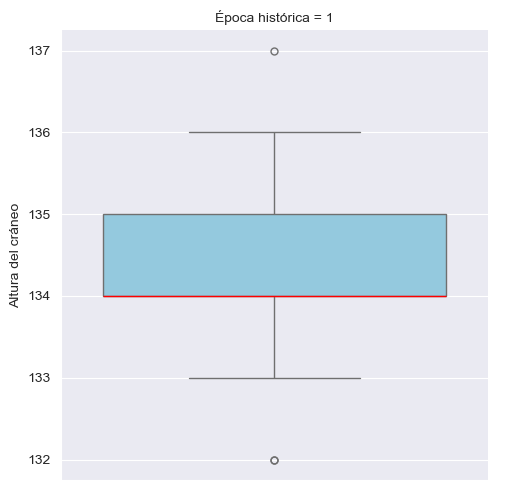

In [99]:
sns.catplot(data = df_1 ,  y='Altura del cráneo' , col ='Época histórica' , kind = 'box', color='skyblue',medianprops={'color':'red'} )
plt.show()

In [100]:
#del grafico de diagrama y bigotes, obseramos dos cosas muy notables
# la primera es que se evidencian dos valores atipicos en la muestra - etos son 132-137, alejados de la media
#ademas que la mediana coincide con el quartil25% por lo que podemos comentar que  hay una gran repitencia del valor 34
#el 25% de los craneos del periodo temprano poseen una altura de 134 cm

MEDIDAS DE TENDENCIA CENTRAL - NO CENTRAL - DISPERSION - FORMA - PREDINASTICO TARDIO

In [101]:
valores_2 = pd.DataFrame(df_2['Altura del cráneo'].describe())
valores_2.reset_index(inplace=True)
valores_2.rename(columns={'index':'Medida'},inplace = True)
#obtencion de algunos de las medidas de tendencia central y no central, calcularemos el resto a continuacion

In [102]:
valores_2.head(5)

,Medida,Altura del cráneo
0,count,30.000000
1,mean,132.900000
2,std,1.028893
3,min,131.000000
4,25%,132.000000


In [103]:
#calculo de la moda para grupo 2 (tardio)
moda_2  = int(df_2['Altura del cráneo'].mode())

In [104]:
#calculo del rango (valor maximo - valor minimo)
rango_2 = df_2['Altura del cráneo'].max() - df_2['Altura del cráneo'].min()

In [105]:
#calculo de la varianza
varianza_2 = df_2['Altura del cráneo'].var()

In [106]:
#calculo del coeficiente de variacion de Pearson -- DESVIACION STANDAR / MEDIA
coef_var_P_2 = valores_2.loc[2][1]/valores_2.loc[1][1]

In [107]:
df_2['Xi - Media'] = df_2['Altura del cráneo'] - valores_2.loc[1][1]
df_2['(Xi - Media)*3'] = df_2['Xi - Media']**3
df_2['(Xi - Media)*4'] = df_2['Xi - Media']**4
#Generacion de columnas de apoyo para el calculo de asimetria y curtosis // resultando en la siguiente tabla

In [108]:
df_2.head(5)

,Época histórica,Unnamed: 1,Altura del cráneo,Xi - Media,(Xi - Media)*3,(Xi - Media)*4
30,2,NaN,134,1.1,1.331,1.4641
31,2,NaN,134,1.1,1.331,1.4641
32,2,NaN,133,0.1,0.001,0.0001
33,2,NaN,135,2.1,9.261,19.4481
34,2,NaN,131,-1.9,-6.859,13.0321


In [109]:
Coef_Fisher_2=df_2['(Xi - Media)*3'].sum()/((df_2['Época histórica'].count()-1)*mt.pow(valores_2.loc[2][1],3))

In [110]:
Coef_Fisher_2
# al obteenr un ceficiente de Fisher negativo, esto indica que existe una mayor concentracion de valores a la izquierda del eje
# de simetria

-0.18235342265753

In [111]:
coeficiente_Curtosis_2 = df_2['(Xi - Media)*4'].sum()/((df_2['Época histórica'].count()-1)*mt.pow(valores_2.loc[2][1],4)) -3

In [112]:
coeficiente_Curtosis_2
#el coeficiente de curtosis es menos que 0 por lo que podemos anticipar una distribucion platicurtica

-0.6968678712771412

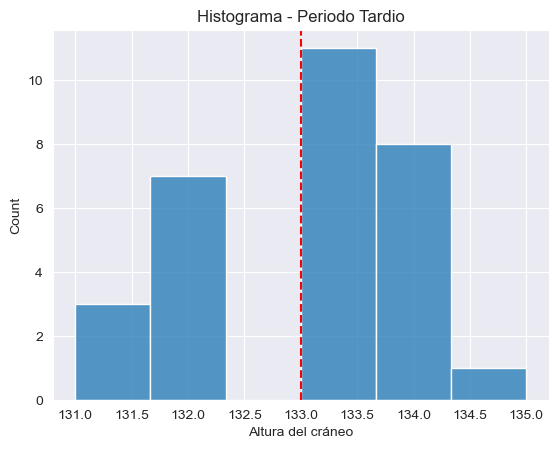

In [113]:
sns.histplot(data=df_2['Altura del cráneo'] )
plt.axvline(x=valores_2.loc[5][1], color='red', linestyle='--')
plt.title('Histograma - Periodo Tardio')
plt.show()

In [114]:
#de los coeficientes de FISHER Y CURTOSIS podemos determinar que
#del coeficinete de Fisher [-0.1823], la distribucion posee mayor concentracion de valores a la izquierda de  la mediana
#ademas el coeficiente de curtosis al ser menor que 0 [-0.6968] nos indica una distribucion platicurtica valores menos
#concentrados en la media a comparacion de la distribucion normal y mas distribuidos en las colas

#colocamos el histograma y una linea constante en la mediana, para observar el comportmiento-forma de la distribucion.
#la interpretacion del histograma es que la mediana coincide con la moda que es de 133. 
#por tanto al comparar las otras frecuencias, encontramos una mayor cantidad de valores a la izquierda indicando una 
#asimetria negativa

In [115]:
Medida_2 = ['moda','rango','varianza','CoeficientePerson','CoeficienteFisher','CoeficienteCurtosis']
Altura_del_Craneo_2 = [moda_2,rango_2, varianza_2,coef_var_P_2,Coef_Fisher_2,coeficiente_Curtosis_2]

medidas_2_2 = pd.DataFrame({'Medida':Medida_2,'Altura del cráneo':Altura_del_Craneo_2})
medidas_2_2

,Medida,Altura del cráneo
0,moda,133.000000
1,rango,4.000000
2,varianza,1.058621
3,CoeficientePerson,0.007742
4,CoeficienteFisher,-0.182353
5,CoeficienteCurtosis,-0.696868


MEDIDAS PERIODO TRARDIO

In [116]:
valores_w_2 = pd.concat([valores_2,medidas_2_2],ignore_index=True)
valores_w_2
#uniremos los dos dataframe con las medidas correspondientes para mostrarlo en uno solo

,Medida,Altura del cráneo
0,count,30.000000
1,mean,132.900000
2,std,1.028893
3,min,131.000000
4,25%,132.000000
5,50%,133.000000
6,75%,134.000000
7,max,135.000000
8,moda,133.000000
9,rango,4.000000


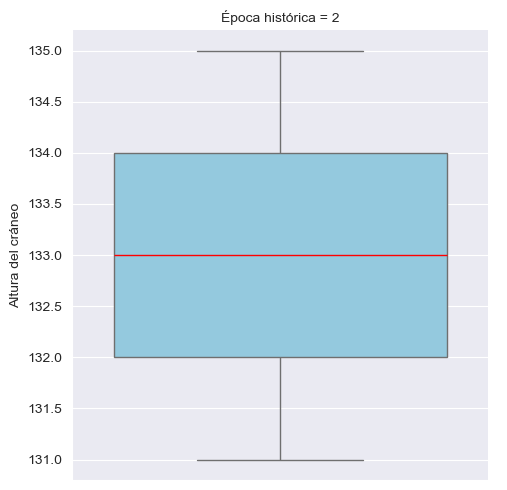

In [117]:
sns.catplot(data = df_2 ,  y='Altura del cráneo' , col ='Época histórica' , kind = 'box', color='skyblue',medianprops={'color':'red'} )
plt.show()

In [118]:
#como vemos en el diagrama de caja para el periodo tardio, no se presentan datos atipicos
#ademas parece que la mediana se encuentra en total armonia con el quartil 1 y 3. sin embargo el histograma mostrado nos inidca 
#que hay una ligera agruoacion de valores a la izquierda 

COMPARATIVA DE LOS DIAGRAMAS DE CAJA PARA AMBOS PERIODOS

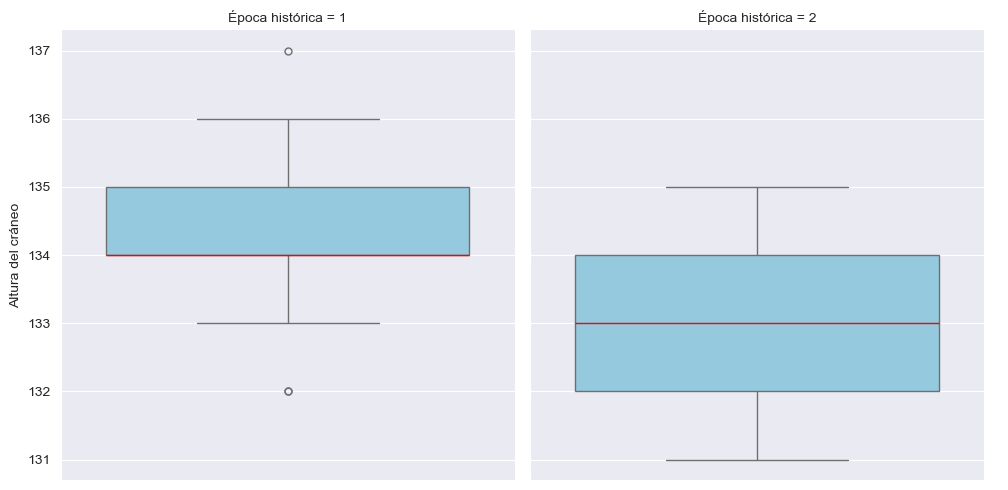

In [119]:
sns.catplot(data = df ,  y='Altura del cráneo' , col ='Época histórica' , kind = 'box', color='skyblue',medianprops={'color':'red'} )
plt.show()

In [120]:
#DONDE PODEMOS DECIR QUE LA DISTRIBUCION 2 ES MAS SIMETRICA EN COMPARACION QUE LA 1 
#ADEMAS QUE LA DISTRIBUCION 1 PRESENTA VALORE ATIPICOS

b) Determinar si cada una de las dos sub-muestras sigue una 
distribución normal utilizando el test de Kolmogorov-Smirnov.

In [121]:
#Ho -> la distribucion 1-2 sigue una muestra normal 
#H1 -> La distribucion 1-2  no sigue una muestra normal

In [122]:
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler

# conversion de los df filtrado a np.array para aprovechar sus caracteristicas
submuestra1 = np.array(df_1['Altura del cráneo'])
submuestra2 = np.array(df_2['Altura del cráneo'])

# Asegurarse de que las submuestras sean arreglos de una sola columna
submuestra1 = submuestra1.reshape(-1, 1)
submuestra2 = submuestra2.reshape(-1, 1)

# Inicializar standarscaler de scktlearn
scaler1 = StandardScaler()
scaler2 = StandardScaler()

# Normalizar las muestras
submuestra1 = scaler1.fit_transform(submuestra1)
submuestra2 = scaler2.fit_transform(submuestra2)

#llevar las submuestras a matriz unidmensional
submuestra1=submuestra1.flatten()
submuestra2=submuestra2.flatten()

# Aplicar la prueba de Kolmogorov-Smirnov
statistic1, pvalue1 = stats.kstest(submuestra1, 'norm')
statistic2, pvalue2 = stats.kstest(submuestra2, 'norm')

# Imprimir los resultados
print("Resultados de la submuestra 1:")
print(f"Estadístico: {statistic1}, Valor p: {pvalue1}")
if pvalue1 > 0.05:
    print("La submuestra 1 sigue una distribución normal")
else:
    print("La submuestra 1 no sigue una distribución normal")

print("\nResultados de la submuestra 2:")
print(f"Estadístico: {statistic2}, Valor p: {pvalue2}")
if pvalue2 > 0.05:
    print("La submuestra 2 sigue una distribución normal")
else:
    print("La submuestra 2 no sigue una distribución normal")


Resultados de la submuestra 1:
Estadístico: 0.2185523238635185, Valor p: 0.09733554527266941
La submuestra 1 sigue una distribución normal

Resultados de la submuestra 2:
Estadístico: 0.2060393166543672, Valor p: 0.13558514721704762
La submuestra 2 sigue una distribución normal


In [123]:
#COMENTARIOS DE LA PRUEBA DE KOLMOGROV

#la muestra 1 posee un estadisrico de 0.2185 y segun la tabla para KMSV una muestra de 30 valores y un alfa = 0.05 el valor del 
#estadistico es 0.24170  por lo que  Dcalculado < Dtabla con lo que se acepta la hipotesis nula 
#por lo que a un intervalo de confianza de 95% no existe suficiente evidencia en contra para rechazar la Ho
#tambien podemos determinar que el pvalor es 0.097 como este es mayor a alfa de  0.05 la Ho no puede ser rechazada
#
#
#la muestra 2 posee un estadisrico de 0.2060 y segun la tabla para KMSV una muestra de 30 valores y un alfa = 0.05 el valor del 
#estadistico es 0.24170  por lo que  Dcalculado < Dtabla con lo que se acepta la hipotesis nula 
#por lo que a un intervalo de confianza de 95% no existe suficiente evidencia en contra para rechazar la Ho
#tambien podemos determinar que el pvalor es 0.135 como este es mayor a alfa de  0.05 la Ho no puede ser rechazada


Ejercicio 2. a) Con los mismos datos del ejercicio anterior, obtener un 
intervalo de confianza (de nivel 0.9, de nivel 0.95 y de nivel 0.99) para la 
diferencia entre las medias de la altura de la cabeza en ambos periodos 
históricos. Interpretar los resultados obtenidos y discutirlos en función del 
test de normalidad del ejercicio anterior. La interpretación debe ser 
rigurosa desde el punto de vista estadístico y también marcada por el 
story telling, es decir, comprensible desde el punto de vista de las 
variables respondiendo a la pregunta ¿en qué época la cabeza era más 
alta?

In [124]:
#abordaremos el intervalo de confianza para con los 3 nivels de confianza. 

#para esta prueba requerimos:
#1.saber si las muesras son independientes - sin embargo el ejericico nos comenta que asumamos esta condicion
#2.por otro lado sabemos que las varianzas poblacionales son desconocidas
#3.ademas requerimos demostrar si las varianzas de las poblacionales son iguales o diferentes 

In [125]:
#3. COMPROBACION SI LAS MUESTRAS POSEEN VARIANZAS POBLACIONALES IGUALES O DIFERENTES

H0: Las muestras poseen varianzas poblacionales iguales        S1 = S2 

H1: Las muestras poseen varianzas poblaciionales diferentes    S1 != S2

In [126]:
#Para probar si las varianzas poblacionales son iguales o diferences, tomaremos un intervalor de confianza del 90%
#ademas mencionar que esta prueba es de dos colas ya que estamos probando igualdad o diferencia
#ademas tengamos presente que debido al test anterior definimos que ambas muesteras siguen una distribucion Normal

In [127]:
#dado que las muestras tiene 30 valores , los grados de libertad para ambos son 29 .
#ademas alfa = 10% -- pero al ser una preuba de dos colas tomaremos alfa/2 para obtener los valores criticos de F. siendo 5%

In [128]:
from scipy.stats import f

gl1= valores_1.loc[0][1] - 1  #cantidad de elementos de la muestra1 - 1
gl2= valores_2.loc[0][1] - 1  #cantidad de elementos de  la muestra 2 -1
alfa_medios = 0.05

In [129]:
valor_tabla_f_derecha = f.ppf(1-alfa_medios,gl1,gl2)   #valor critico por la derecha de la curva F

In [130]:
valor_tabla_f_izquierda = 1/valor_tabla_f_derecha     #al tener el mismo numero de GL la inversa es el valor de la izquierda

In [131]:
print("la zona de aprobacion de la H0 es:",valor_tabla_f_izquierda,"<F<",valor_tabla_f_derecha)

la zona de aprobacion de la H0 es: 0.5373999648406917 <F< 1.8608114354760754


In [132]:
#calcularemos el estadistico de F que es las divicion de las desviaciones estandar de las muestras al cuadrado
Fisher = mt.pow (valores_1.loc[2][1],2)/mt.pow(valores_2.loc[2][1],2)
Fisher

1.0814332247557006

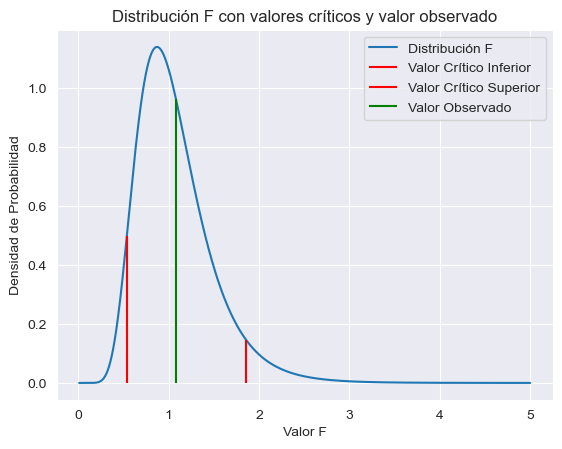

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Definir el rango de valores de F
f_values = np.linspace(0.01, 5, 1000)

# Calcular la distribución F
f_distribucion = f.pdf(f_values, gl1, gl2)

# Graficar la distribución F
plt.plot(f_values, f_distribucion, label='Distribución F')

# Graficar los valores críticos y el valor observado
plt.vlines(valor_tabla_f_izquierda, 0, f.pdf(valor_tabla_f_izquierda, gl1, gl2), colors='r', label='Valor Crítico Inferior')
plt.vlines(valor_tabla_f_derecha, 0, f.pdf(valor_tabla_f_derecha, gl1, gl2), colors='r', label='Valor Crítico Superior')
plt.vlines(Fisher, 0, f.pdf(Fisher, gl1, gl2), colors='g', label='Valor Observado')

# Configurar la leyenda y etiquetas
plt.legend()
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución F con valores críticos y valor observado')

# Mostrar la gráfica
plt.show()


De donde podemos decir que al estar el valro F dentro del intervalo de aceptacion, 0.5373 - 1.8308
Con un nivel de significacia del 90%, no existe evidencia suficiente para rechazar la H0

In [134]:
#Ahora sabiendo que las muestras son independientes - Las varianzas Desconocias y ademas estas son Iguales Podemos
#calcular de lleno el intervalor de confianza para la diferencua de Medias

In [135]:
from scipy.stats import t

diferencia_medias = valores_1.loc[1][1] - valores_2.loc[1][1]
n1=valores_1.loc[0][1]
n2=valores_2.loc[0][1]
s1 = valores_1.loc[2][1]
s2 = valores_2.loc[2][1]
grados_libertad = n1+n2-2
error_standar  = mt.sqrt((((n1*mt.pow(s1,2)+n2*mt.pow(s2,2))*((1/n1)+(1/n2)))/(grados_libertad)))
#el error standar para la diferencia de medias, es el determinado ya que las varianzas poblacionales son desconocidas pero iguales

intervalo_90 = stats.t.interval(0.90,grados_libertad,loc=diferencia_medias,scale=error_standar)
intervalo_95 = stats.t.interval(0.95,grados_libertad,loc=diferencia_medias,scale=error_standar)
intervalo_99 = stats.t.interval(0.99,grados_libertad,loc=diferencia_medias,scale=error_standar)

In [136]:
print("los intervalos de confianza para la diferencia de medias con un 90% de confianza es:" ,intervalo_90)
print("--------------------------------------------------------------------------------------------------------------")
print("los intervalos de confianza para la diferencia de medias con un 95% de confianza es:" ,intervalo_95)
print("--------------------------------------------------------------------------------------------------------------")
print("los intervalos de confianza para la diferencia de medias con un 99% de confianza es:" ,intervalo_99)

los intervalos de confianza para la diferencia de medias con un 90% de confianza es: (1.0392423858364546, 1.9607576141635452)
--------------------------------------------------------------------------------------------------------------
los intervalos de confianza para la diferencia de medias con un 95% de confianza es: (0.9482336466186658, 2.051766353381334)
--------------------------------------------------------------------------------------------------------------
los intervalos de confianza para la diferencia de medias con un 99% de confianza es: (0.7658743593933983, 2.2341256406066017)


In [137]:
#como los intervalos para los 3 niveles de confianza determinados (90-95-99) el 0 no esta incluido en estos intervalos
#como podemos ver en el resultado antrerior
#lo que podemos mencionar en estos 3 casos ya que el valor 0 no esta incluido en los intervalos la difernecia entre las medias
#es estadisticamente considerable y no puede atribuirse a aleatoridad 
#en otras palabras los craneos de ambas poblaciones son condiderablemente distintos, y el craneo del periodo temprano son mas
#alargados que los craneos del periodo tardio

b) Utilizar el test t para contrastar la hipótesis de que ambas medias son 
iguales. Explicar qué condiciones se deben cumplir para poder aplicar ese 
contraste. Determinar si se cumplen. Admitiremos de forma natural la 
independencia entre ambas muestras, así que esa condición no hace falta 
comprobarla.
Observación: Quiero insistir en que debéis hacer el test t para la diferencia 
de medias aunque las condiciones no se cumplan. En ese caso discutir la 
validez de los resultados obtenidos

In [138]:
#para poder probar la diferencia de medias de dos poblaciones. debemos considerar que se deben cumplir 3 condiciones

#1. Normalidad de los datos   (con la prueba de kolmogrov- smirnoy se probo que las muestrras siguen una Distribucion Normal)
#2. Homogenidad de la varianza           (se demostro en el ejericio anterior que las varianzas son homogeneas con prueba F)
#3. Independencia de las observaciones  (el ejericio nos exige que esta condicion ya se cumple)

In [139]:
#por lo que se cumplen todas las condiciones necesariaas para poder aplicar las pruebas de hipotesis para diferencia de medias

H0: las medias de ambas muestras son iguales --------- M0 = M1     
H1: Las medias de ambas muestras son diferentes ------ M0 != M1

In [140]:
#como tenemos una prueba de hipotrsis de comprobar si las medias son iguales o distintas, esta corresponde a una prueba de 
#dos colas 

#ademas consideraremos un intervalo de confianza del 95% por lo que el alfa sera 0.025 -- a cada lado de la curba 

#tambien tenemos los grados de libertad correspindeintes a N1 +N2 -2 

In [141]:
#calcularemos los valores cirticos correspondeintes a la distribucion T 

alfa = 0.05
alfa_medios = alfa/2

lim_sup = t.ppf(1-alfa_medios,grados_libertad)
lim_inf = t.ppf(alfa_medios,grados_libertad)

print("la zona de aceptacion para la prueba es :",lim_inf,",",lim_sup)

la zona de aceptacion para la prueba es : -2.001717484145236 , 2.0017174841452356


#calculo del valor T 

t = (Mmuestral1 - Mmuestral2) - (Mpobalcional1 - Mpoblacional2) / Error Standr Estimado

como sabemos estamos probando en la Ho que las MediasPoblacionales son iguales, asi que la diferencia de las Medias en la
formula anterior es 0 --- (Mpobalcional1 - Mpoblacional2) = 0 

quedandonos el T: 

t = (Mmuestral1 - Mmuestral2) / Error Standr Estimado

teniendo estos valores ya listos, calcularemos el Tobservado

In [142]:
#calculo del error estandar, este error es el mismo del ejericcio anterior 

t=  float(diferencia_medias)/(error_standar)

print("el valor critico de T es :", t)

el valor critico de T es : 5.441753031545813


In [143]:
#como observamos el valor critioc de T, no se encunetra dentro del intervalopara aceptar la Ho
#observamos elgrafico que determinan

NameError: name 'valor_critico' is not defined

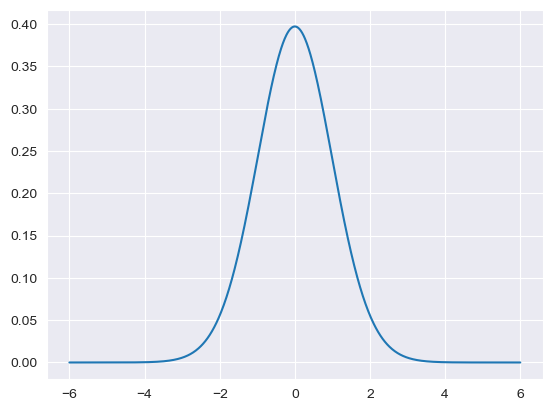

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Definir el rango de valores de t
t_values = np.linspace(-6, 6, 1000)

# Calcular la distribución t
t_distribucion = t.pdf(t_values, grados_libertad)

# Graficar la distribución t
plt.plot(t_values, t_distribucion, label='Distribución t')

# Graficar el valor crítico y el valor t observado
plt.vlines(lim_inf, 0, t.pdf(valor_critico, grados_libertad), colors='r', label='Valor Crítico 0.025')
plt.vlines(lim_sup, 0, t.pdf(valor_critico, grados_libertad), colors='r', label='Valor Crítico 0.950')

plt.vlines(5.4417, 0, t.pdf(valor_t_observado, grados_libertad), colors='g', label='Valor t Observado')

# Configurar la leyenda y etiquetas
plt.legend()
plt.xlabel('Valor t')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución t con valor crítico y valor t observado')

plt.show()


In [197]:
#Como observamos en la grafica el valor T critico se encunetra en la zona de rechazo de la H0,
#por lo que podemos establecer que existe una diferencia significativa entre las medias de ambas poblaciones
#estas diferencias ademas no se deben a un factor de aleatoridad, si no que estadisticamente podemos decir que ambas 
#muestras son diferentes 

# como vemos que el valor observado se encuentra a la derecha , podemos decir que : 
#el craneo de la muesrtra del periodo temprano son mas alargados que los craneos del periodo tardio 